# Chapter 4: Training Models Notes

## 1. Implementations of Linear Regression

### 1.1 The Normal Equation

- Recall: $\hat{\beta} = (X^T X)^{-1} X^T y$ and $\hat{y} = X \hat{\beta}$
- First, do some OG OLS `python` style

In [1]:
# Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

# Generate fake linear-ish data
np.random.seed(42)
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

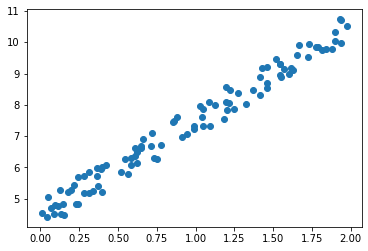

In [2]:
# Plot
plt.figure()
plt.plot(X, y, 'o')
plt.show()

In [3]:
# Do the manual matrix algebra
X_b = np.c_[np.ones((100, 1)), X] # add the intercept
beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
beta_hat

array([[4.51359766],
       [2.98323418]])

In [4]:
y_hat = X_b.dot(beta_hat)

In [5]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_hat, y)

0.08495655256593736

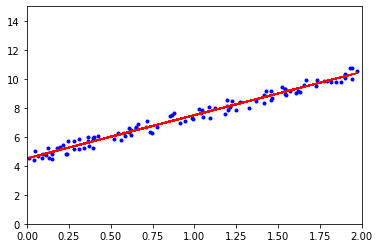

In [6]:
plt.figure()
plt.plot(X, y, 'b.')
plt.plot(X, y_hat, 'r-')
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# Prediciton for some new data

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(beta_hat)
y_pred

array([[ 4.51359766],
       [10.48006601]])

### 1.2 Sklearn Version

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [9]:
lin_reg.predict(X_new) # perfect match

array([[ 4.51359766],
       [10.48006601]])

In [10]:
# sklearn just implements the SVD implementation from scipy

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [11]:
# Can also compute the pseudoinverse using numpy

np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

### 1.3 Gradient Descent

#### 1.3.1 Batch gradient descent

- GD on the whole dataset
$$\nabla_\theta \mathrm{MSE}(\theta) = \frac{2}{m} X^T (X \theta - y)$$
$$\theta^{\mathrm{next}} = \theta - \eta \nabla_\theta \mathrm{MSE}(\theta)$$

In [12]:
# Implementation

eta = 0.1 # learning rate
n_iterations = 1000
m = 100
np.random.seed(42)

theta = np.random.randn(2, 1) # random init

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [13]:
theta

array([[4.51359766],
       [2.98323418]])

In [14]:
# Obviously, convergence is modulated by the learning rate and the number of iterations
# Plot the convergence for different rates

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize = 16)

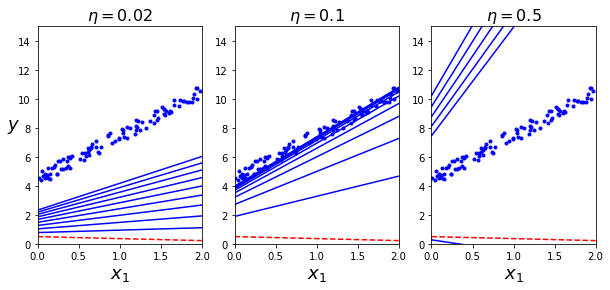

In [15]:
np.random.seed(42)

theta = np.random.randn(2, 1)

plt.figure(figsize = (10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)

plt.show()

#### 1.3.2 Stochastic gradient descent

Consider implementing SGD with momentum reduction _learning schedule_

In [16]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

In [17]:
theta

array([[4.5151857 ],
       [2.97924466]])

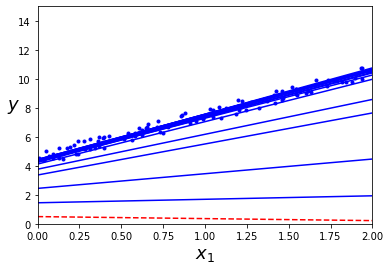

In [18]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

#### 1.3.3 sklearn SGD

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.49695399]), array([2.98441378]))

#### 1.3.4 Mini-batch GD

In [21]:
# Implement the algo (with momentum)

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000

def learning_schedule(t):
    return t0/(t + t1)

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta*gradients
        theta_path_mgd.append(theta)

In [22]:
theta

array([[4.52651397],
       [2.99723869]])

In [23]:
# Gather the different results

theta_path_bgd = np.array(theta_path_bgd) # batch descent
theta_path_sgd = np.array(theta_path_sgd) # stochastic descent w/momentum
theta_path_mgd = np.array(theta_path_mgd) # minibatch descent w/momentum

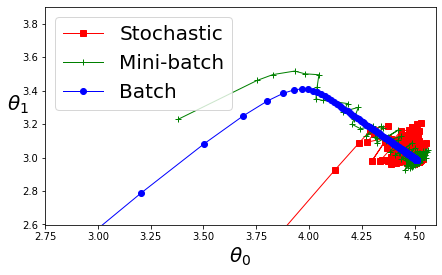

In [24]:
# Plot the convergence of the coefficients

plt.figure(figsize = (7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth = 1, label = "Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth = 1, label = "Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth = 1, label = "Batch")
plt.legend(loc = "upper left", fontsize = 20)
plt.xlabel(r"$\theta_0$", fontsize = 20)
plt.ylabel(r"$\theta_1$", fontsize = 20, rotation = 0)
plt.axis([2.75, 4.6, 2.6, 3.9])
plt.show()

## 2. Learning Curves

### 2.1 Case Study: Polynomial Regression

In [25]:
# Make sample data

np.random.seed(42)
m = 100

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

[-3, 3, 0, 10]

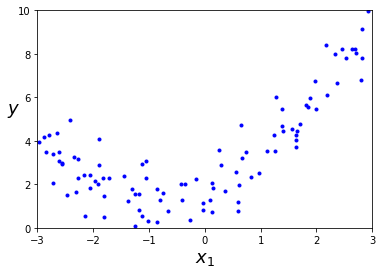

In [26]:
# Plot the sample data

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([-3, 3, 0, 10])

In [27]:
# Train quadratic sklearn model

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [28]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
# Can fit linear model to training data augmented with squared column

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

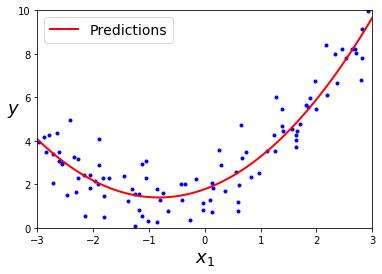

In [30]:
# Plot the fit

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### 2.2 Case Study: Bias/Variance Tradeoff

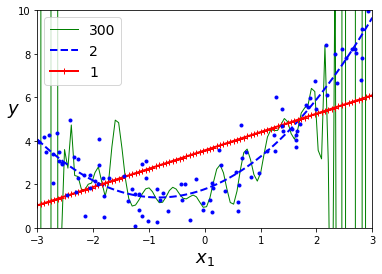

In [31]:
# Know the data is quadratic - try other poly fits

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label = str(degree), linewidth = width)
    
plt.plot(X, y, "b.", linewidth = 3)
plt.legend(loc = "upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### 2.3 Learning Curves

In [32]:
# Make function to plot train vs. val learning curve

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    plt.legend(loc = "upper right", fontsize = 14)
    plt.xlabel("Training set size", fontsize = 14)
    plt.ylabel("RMSE", fontsize = 14)

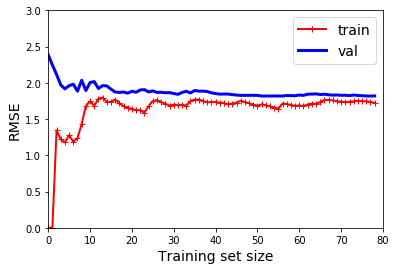

In [33]:
# Linear regression learning curve

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

__Notes__:
   - Model appears to be underfitting: val error goes down with learning, but then plateaus

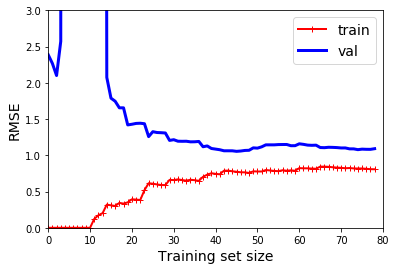

In [34]:
# Try overfit 10-degree poly

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

__Notes__:
   - Training error much lower than lin reg
   - Gap between curves -- model much better on train than val, plus see plateau again
   - Overfitting!

## 3. Regularization

In [35]:
# Set up example data

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1)/1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

### 3.1 Ridge

#### 3.1.1 Direct solution using matrix methods

In [36]:
# Cholesky decomposition

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [37]:
# Alternatively, use 'sag': stochastic average gradient descent

ridge_reg = Ridge(alpha = 1, solver = "sag", random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [38]:
# As a third alternative, can implement using SGD with L2 penalty

sgd_reg = SGDRegressor(penalty = "l2", max_iter = 1000, tol = 1e-3, random_state = 42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]]) # worst of the three approaches...

array([1.47012588])

#### 3.1.2 Effect of ridge regularization parameter on various models

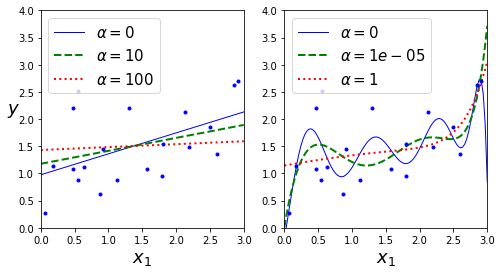

In [39]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
                ("std_scaler", StandardScaler()),
                ("ridge_reg", model)
            ])
        model.fit(X, y)
        y_new_reg = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_reg, style, linewidth = lw, label = r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth = 3)
    plt.legend(loc = "upper left", fontsize = 15)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis([0, 3, 0, 4])
    
plt.figure(figsize = (8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial = False, alphas = (0, 10, 100), random_state = 42)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(122)
plot_model(Ridge, polynomial = True, alphas = (0, 10**-5, 1), random_state = 42)

plt.show()

### 3.2 Lasso and ElasticNet

#### 3.2.1 Lasso bias/variance

C:\Users\rschm\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


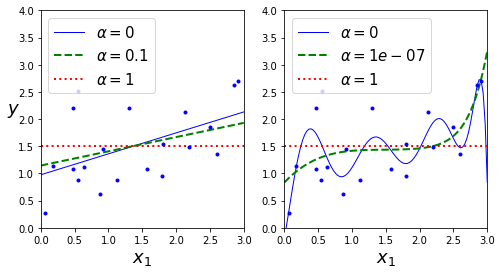

In [40]:
# Try lasso plot for same comparison (linear vs. overfit polynomial)

from sklearn.linear_model import Lasso

plt.figure(figsize = (8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial = False, alphas = (0, 0.1, 1), random_state = 42)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(122)
plot_model(Lasso, polynomial = True, alphas = (0, 10**-7, 1), random_state = 42)

plt.show()

#### 3.2.2 Example lasso fit

In [41]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

#### 3.2.3 Example elastic net fit

In [42]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### 3.3 Coefficient Path

In [43]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

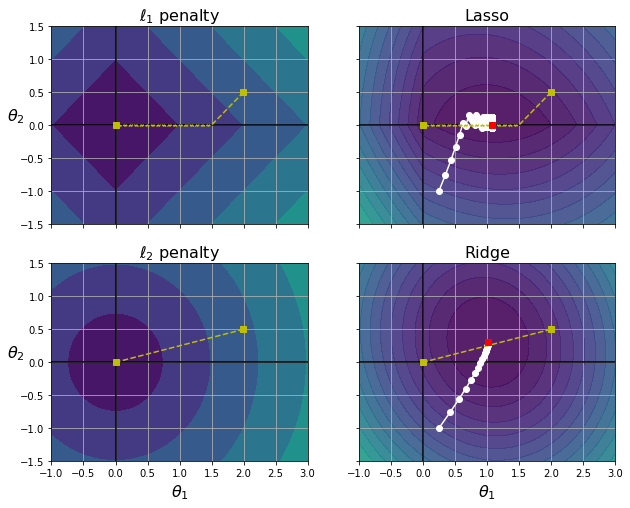

In [44]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.show()

### 3.4 Early Stopping

In [45]:
# Example train, val set

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [46]:
# Set up functions for example -- complex polynomial early stopping

from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Turn 'warm_start' on to resume training where the model left off at each epoch
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

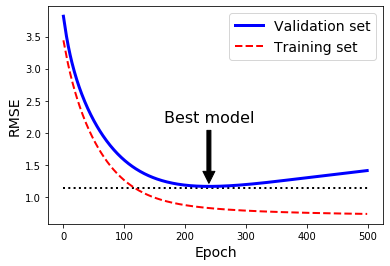

In [47]:
# Plot the results

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## 4. Logistic Regression

### 4.1 Logistic Function

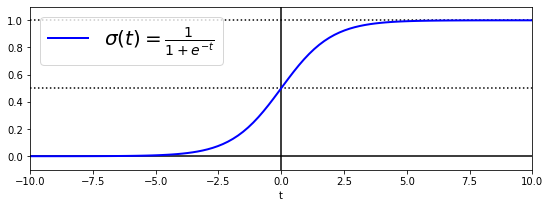

In [48]:
t = np.linspace(-10, 10, 100) # input axis
sig = 1/(1 + np.exp(-t))

plt.figure(figsize = (9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

### 4.2 Example Classifier

Using the `iris` dataset

#### 4.2.1 Model training

In [49]:
# Load the data

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [50]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [51]:
# Train a logistic regression model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() # regularized by default!!
log_reg.fit(X, y)

LogisticRegression()

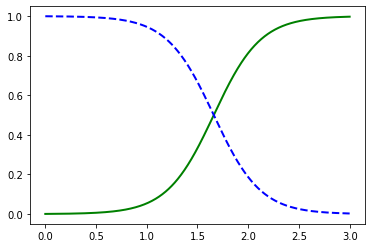

In [52]:
# Plot a basic sigmoid tradeoff

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth = 2, label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth = 2, label = "Not Iris virginica")

#### 4.2.2 Decision boundary

C:\Users\rschm\Anaconda3\lib\site-packages\matplotlib\patches.py:1306: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


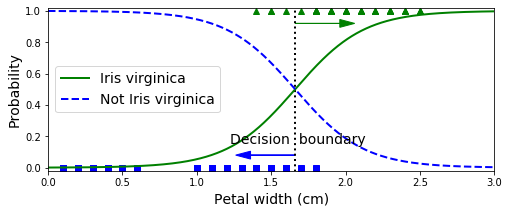

In [53]:
# Fancier plot!

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [54]:
decision_boundary # decision boundary around 1.6 cm

array([1.66066066])

In [55]:
log_reg.predict([[1.7], [1.5]]) # class predictions

array([1, 0])

#### 4.2.3 Probability based on distance to threshold

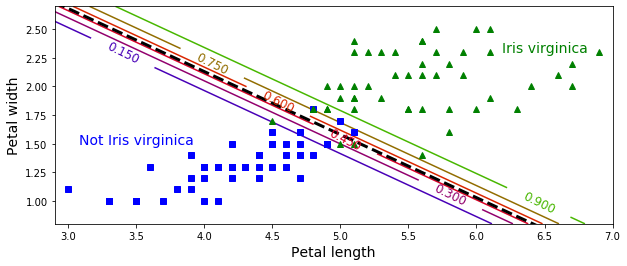

In [56]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### 4.3 Softmax Regression

#### 4.3.1 Example multiclass problem

In [57]:
X = iris["data"][:, (2, 3)] # predict on petal length, petal width
y = iris["target"] # all 3 types

In [58]:
# L2-penalized softmax

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10, random_state = 42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [59]:
# Make predictions

softmax_reg.predict([[5, 2]]) # predicts class 3

array([2])

In [60]:
softmax_reg.predict_proba([[5, 2]]) # third class has max prob

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

#### 4.3.2 Plot the decision boundary

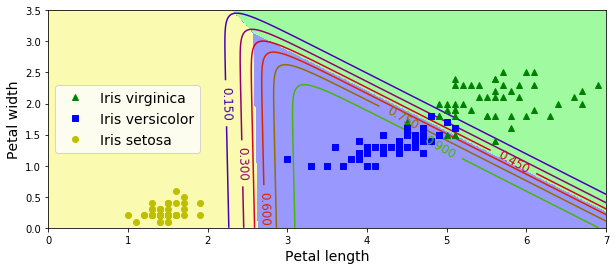

In [61]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

## 5. Early Stopping Batch GD for Softmax Regression (Exercise 12)

_Goal_ : implement batch GD with early stopping for softmax regression w/o `sklearn`

### 5.1 Preliminaries

#### 5.1.1 Data setup

In [133]:
# Load the data

np.random.seed(2042)

X = iris["data"][:, (2, 3)] # predict on petal length & width
y = iris["target"]

In [134]:
# Add bias term

X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [135]:
# Split into train/val/test w/o scikit

test_ratio = 0.2
val_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
val_size = int(total_size * val_ratio)
train_size = total_size - test_size - val_size

rnd_indices = np.random.permutation(total_size)

X_train, y_train = X_with_bias[rnd_indices[:train_size]], y[rnd_indices[:train_size]]

X_val, y_val = X_with_bias[rnd_indices[train_size:-test_size]], y[rnd_indices[train_size:-test_size]]

X_test, y_test = X_with_bias[rnd_indices[-test_size:]], y[rnd_indices[-test_size:]]

In [136]:
y_train # train set is currently classes -- need one-hot encoding!

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2,
       2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0,
       0, 0])

In [137]:
# Manually implement one-hot encoding

def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    
    # Arrange the vector in order from 0-max
    # Put a 1 in the column indicated by the original vector y!
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [138]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [139]:
to_one_hot(y_train[:10]) # works!

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [140]:
# Create target one-hot vectors

Y_train_one_hot = to_one_hot(y_train)
Y_val_one_hot = to_one_hot(y_val)
Y_test_one_hot = to_one_hot(y_test)

#### 5.1.2 Softmax function and final setup

$\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^K \exp(s_j(\mathbf{x}))}$

In [141]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis = 1, keepdims = True)
    return exps/exp_sums # returns a softmax vector for every class

In [142]:
# Define inputs, outputs

n_inputs = X_train.shape[1] # 2 features + bias
n_outputs = len(np.unique(y_train)) # 3 iris classes

### 5.2 Training

#### 5.2.1 Batch GD

__Cost function__ :

$$J(\mathbf{\Theta}) = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log (\hat{p}_k^{(i)})$$

__Gradients__ :

$$\nabla_{\mathbf{\theta}^{(k)}} J(\mathbf{\Theta}) = \frac{1}{m} \sum_{i=1}^m (\hat{p}_k^{(i)} - y_k^{(i)}) \mathbf{x}^{(i)}$$

_Note_ : $\log (\hat{p}_k^{(i)})$ may not be computable if $\hat{p}_k^{(i)} \approx 0 \to$ add small $\epsilon$ to the log term to avoid `nan`

In [143]:
# Implement training

eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss) # status report
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta*gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.4106007142918712
5000 0.3956780375390374


In [144]:
# Examine parameters

Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [145]:
# Make predictions on the val set

logits = X_val.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis = 1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

0.9666666666666667

#### 5.2.2 L2 regularization

In [146]:
eta = 0.1 # try increase the learning rate
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    
    # Build the loss in steps
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    
    # Finish as before
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss) # status report
        
    # New gradient update with L2 term
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta*gradients

0 6.629842469083912
500 0.5339667976629506
1000 0.503640075014894
1500 0.4946891059460321
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.489035124439786
4000 0.4889173621830817
4500 0.4888643337449302
5000 0.4888403120738818


In [147]:
# Make predictions and check val performance

logits = X_val.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis = 1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

1.0

#### 5.2.3 Early stopping

_Goal_ : check loss on val set at every iteration and stop when the error starts to increase

In [148]:
eta = 0.1 # try increase the learning rate
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    ## L2 Batch GD as before ##
    # Preliminaries
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    
    # Build the loss in steps
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
        
    # New gradient update with L2 term
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta*gradients
    
    
    ## Early stopping ##
    logits = X_val.dot(Theta)
    Y_proba = softmax(logits)
    
    # Check the val loss
    xentropy_loss = -np.mean(np.sum(Y_val_one_hot * np.log(Y_proba + epsilon), axis = 1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    
    # Print progress
    if iteration % 500 == 0:
        print (iteration, loss)
    
    # Early stopping
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109127
1500 0.5355752782580262
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327977 early stopping!


In [149]:
# Check performance on the val set

logits = X_val.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis = 1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

1.0

### 5.3 Results

Check performance on the whole dataset

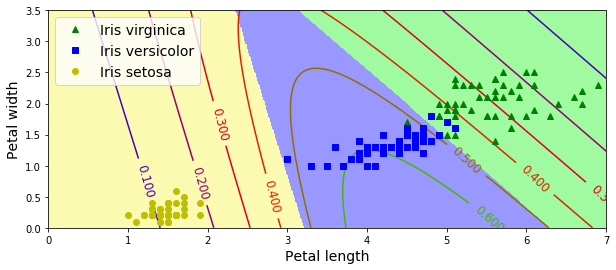

In [150]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

Check performance on the test set:

In [152]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis = 1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score # still good, but val error way overestimates the test error!

0.9333333333333333